In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16

In [2]:
df = pd.read_csv('university-of-california-2016.csv')

/Users/samdixon/miniconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
first = pd.Series([name.split()[0].lower() for name in df['Employee Name']])
first.unique()

array(['james', 'cuonzo', 'daniel', ..., 'xuekai', 'kolone', 'danildon'], dtype=object)

In [9]:
from gender import gender

In [26]:
len(gender.keys())

5177

In [21]:
gender_match = [gender[name.upper()] if name.upper() in gender.keys() else '' for name in first]

In [22]:
df['gender'] = gender_match

In [28]:
len(df[df['gender'] == ''])/len(df)

0.49695508361927726

In [30]:
df[df['gender']=='']['Employee Name']

1                    Cuonzo Martin
6             Vadiyala Mohan Reddy
14                  Khalil M Tabsh
15             Naveen D Bhandarkar
17                  Abbas Ardehali
18                Dinesh K Chhetri
19                 Ehtisham Mahmud
21                 Jagdeep Bachher
25             Shang I Brian Jiang
36        Gert Diederick Pretorius
43               Praveen Mummaneni
52              Shahryar A Ashouri
59                 Nader Pouratian
68                 Hamid Djalilian
70                Karo Karen Arzoo
75                  C. Benjamin Ma
77                      Hanmin Lee
78            Talmadge E, Jr. King
81                   Alpesh N Amin
85                      Sumit Garg
91            Johnese Maria Spisso
93                  Akira Ishiyama
94                 Sigurd H Berven
97                   Vedat Deviren
99                    Arno J Mundt
100                   Marjan Farid
102                Jasleen Kukreja
106                      Kee D Kim
108               Ai

In [34]:
len(df[df['Employee Name']=='Not provided'])/len(df)

0.37664911503360915

In [36]:
df.to_csv('university-of-california-2016-with-gender.csv')

In [37]:
df.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status', 'gender'],
      dtype='object')

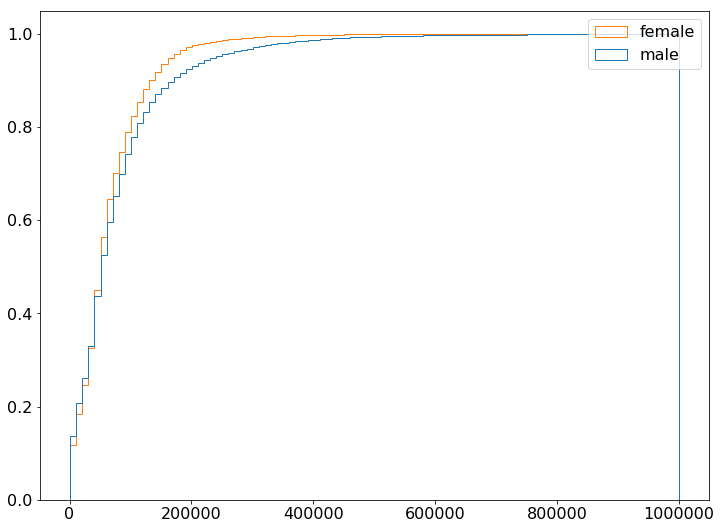

In [63]:
plt.hist([df[df['gender']=='male']['Total Pay'], df[df['gender']=='female']['Total Pay']], histtype='step',
         cumulative=True,
         normed=True, bins=100, range=(1e3, 1e6), label=['male', 'female'])
plt.legend()

In [70]:
profs = [i for i in df.index.values if 'PROF' in df.iloc[i]['Job Title']]

KeyboardInterrupt: 

In [ ]:
profs